## C S 329E HW 11

# Hierarchical Clustering and Cluster Evaluation

## Jeremy Ulfohn, pair 17

This week, let us consider presidential elections of years past and do some exploratory grouping of states based on the 2008,2012, and 2016 presidential elections results.  The data we have is from the [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections) and split into two files:

  - `votes_by_state.csv` => has the raw number of ballots cast for each of the top presidential candidates from 2008-2012 by US State (and the District of Columbia)
  - `republican_percentage_by_state.csv` => has the percentage of votes that were for the Republican candidate for 2008, 2012, and 2016 by US State (and the District of Columbia)
  
Our job is to group together states using different hierarchical agglomerative methodologies and compare the results.  You can imagine how finding states that tend to vote similarly to each other might be useful for election predictions, or for identifying swing states as part of a political campaign to invest in.

In [ ]:
# Do not modify import block, all necessary imports are included

# Our regular libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# This is for our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# For our k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

## Q1 - Using Different Proximity Functions

There is another scientific python library we haven't used much, SciPy, which has [library for hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) and for [plotting dendrograms](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram). 

Use these libraries to plot the hierarchical clusters formed from the raw vote count (`votes_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  
The x-axis of the dendrogram should be labeled using the state name (and not the index of the state in the data frame).  The title should reflect what proximity measure you used to create the clusters.  In this use case only the number of votes cast are attributes, and the State names are the labels on that row of data.

Note, to make the plot legible you will have to change the plot size.  I found `figsize=(25,8)` worked well for me, but your mileage may vary depending on your setup. 

In [ ]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('https://gist.githubusercontent.com/TieJean/a63b4d51246aec6b73bb75944dd69ead/raw/292d338340efa19b8b47958ee4cfcca5e3d8e09c/votes_by_state.csv')
s_states = df_X['State'] # series of index - state correspondences
df_X = df_X.drop(columns=['State']) # contains vote COUNTS by candidate


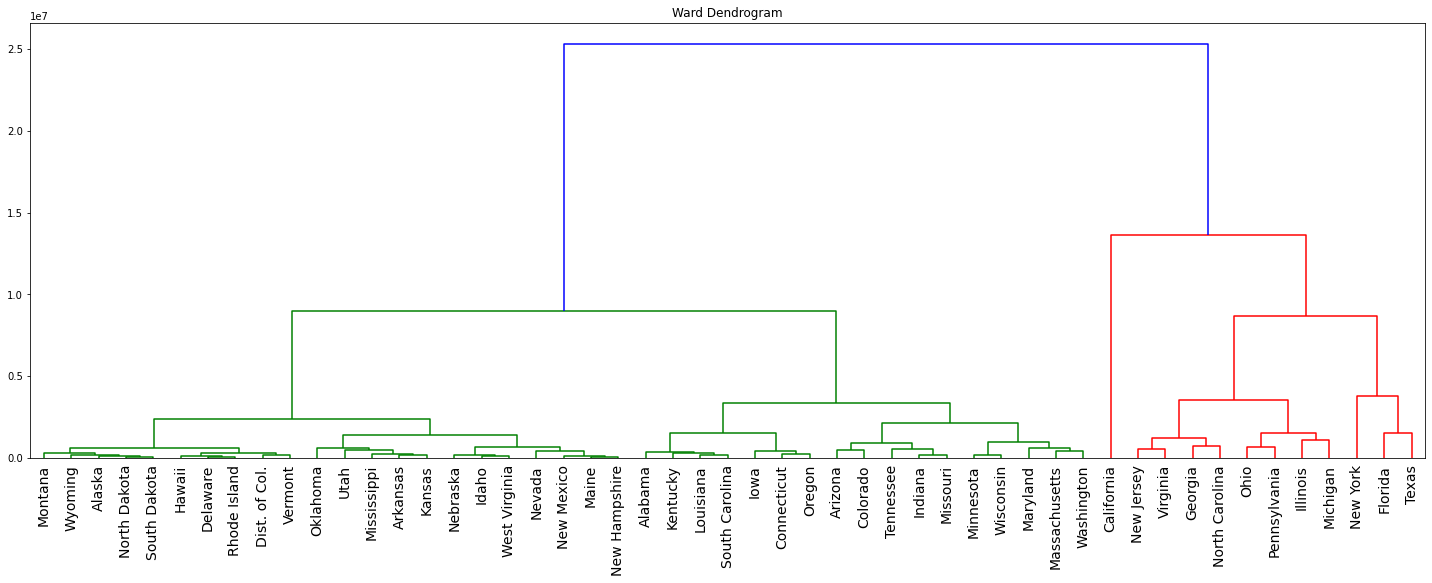

In [ ]:
# Plot the dendrogram for the Ward proximity measure
# X axis -- labeled with state name, NOT index
# title -- which proximity measure was used
# only attribute is number of votes cast. dendro requires heir clust first
hier_clustering = linkage(df_X, method='ward')
fig, ax = plt.subplots(figsize=(25,8))
# labels parameter must be ndarray object
dendrogram_ward = dendrogram(hier_clustering, ax=ax,
                             labels=s_states.to_numpy(), leaf_font_size = 14)
plt.title("Ward Dendrogram")
plt.show()




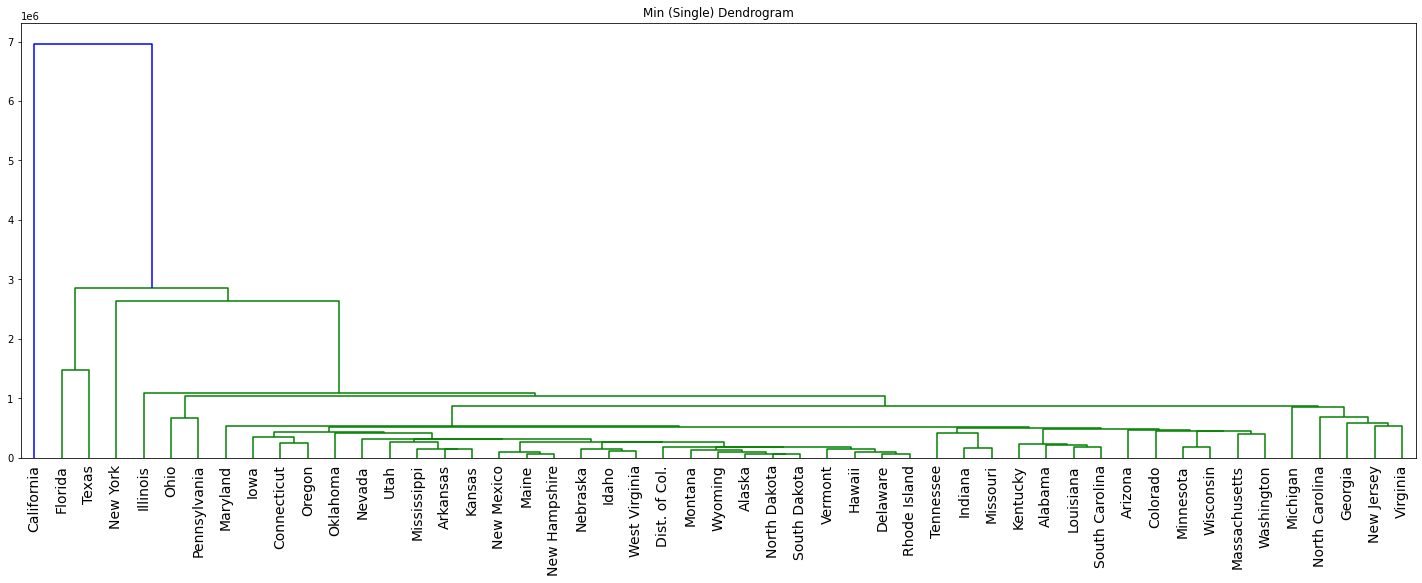

In [ ]:
# Plot the dendrogram for the min proximity measure
hier_clustering = linkage(df_X, method='single') # method 'single' ~ minimum
fig, ax = plt.subplots(figsize=(25,8))
# labels parameter must be ndarray object (or just array-like)
dendrogram_min = dendrogram(hier_clustering, ax=ax,
                            labels=s_states.to_numpy(), leaf_font_size = 14)
plt.title("Min (Single) Dendrogram")
plt.show()

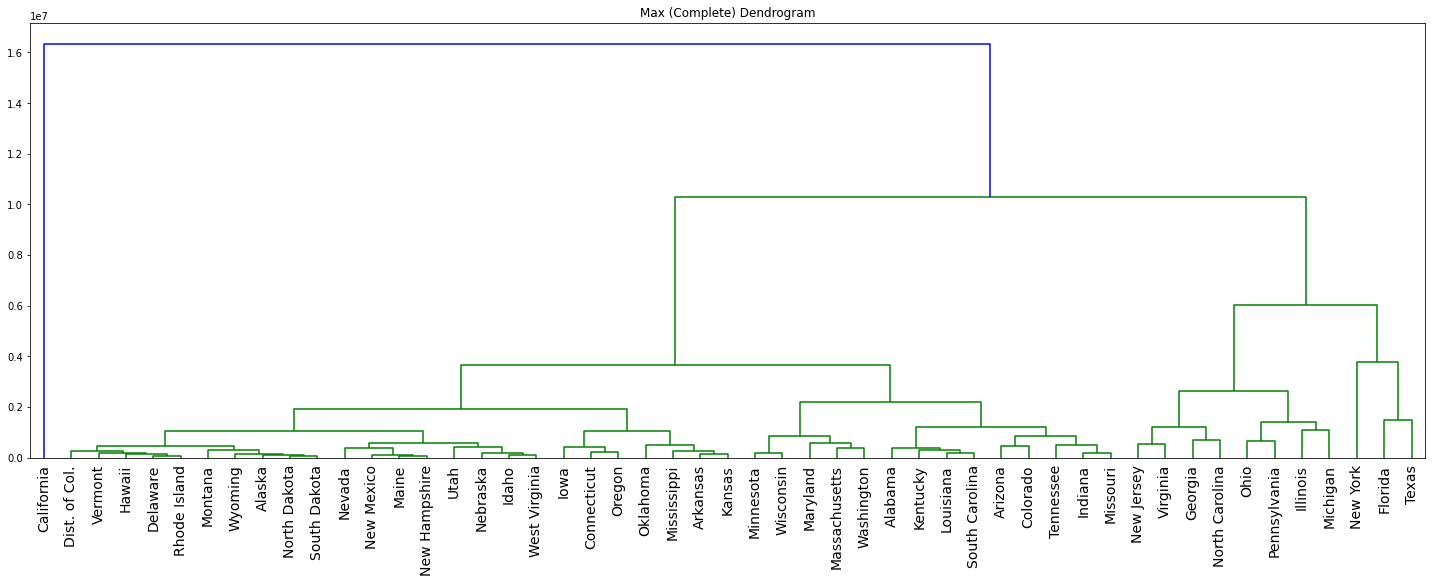

In [ ]:
# Plot the dendrogram for the max proximity measure
hier_clustering = linkage(df_X, method='complete') # method 'complete' ~ maximum
fig, ax = plt.subplots(figsize=(25,8))
# labels parameter must be ndarray object
dendrogram_max = dendrogram(hier_clustering, ax=ax,
                            labels=s_states.to_numpy(), leaf_font_size = 14)
plt.title("Max (Complete) Dendrogram")
plt.show()

## Q2 - Using Different Proximity Functions (part 2)

What is happening?  Even if you aren't a big politics wonk, you might find it strange that New York is closer to Texas than it is to California in all of those graphs!! You may think to yourself, "Self, how could this be?" You also might notice that Montana, Wyoming, and Alaska all tend to cluster together in all of these scenarios. 

At this point, your data science brain might be noticing that the _population_ of that state seems to be more important than which party _won_ the state.  You decide to engineer the data such that you reduce the dimensions down from 7 attributes, to 3 attributes, where each column is the _percentage_ of votes that were cast to the Republican candidate, and a 4th attribute indicating the range of percentages across the 3 elections.  I went ahead and did this for you, and created the file `republican_percentage_by_state.csv`. 

Plot the hierarchical clusters formed from percentage of ballots cast by Republicans (`republican_percentage_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  
The x-axis of the dendrogram should be labeled using the state name (and not the index of the state in the data frame).  The title should reflect what proximity measure you used to create the clusters.  In this use case only the number of votes cast are attributes, and the State names are the labels on that row of data.

Note, to make the plot legible you will have to change the plot size.  I found `figsize=(12,8)` worked well for me, but your mileage may vary depending on your setup. 

In [ ]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('https://gist.githubusercontent.com/TieJean/74d13de3875643140d620f0664e1c933/raw/294658528271118725d4b10779cbb430597cf07d/republican_percentage_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])

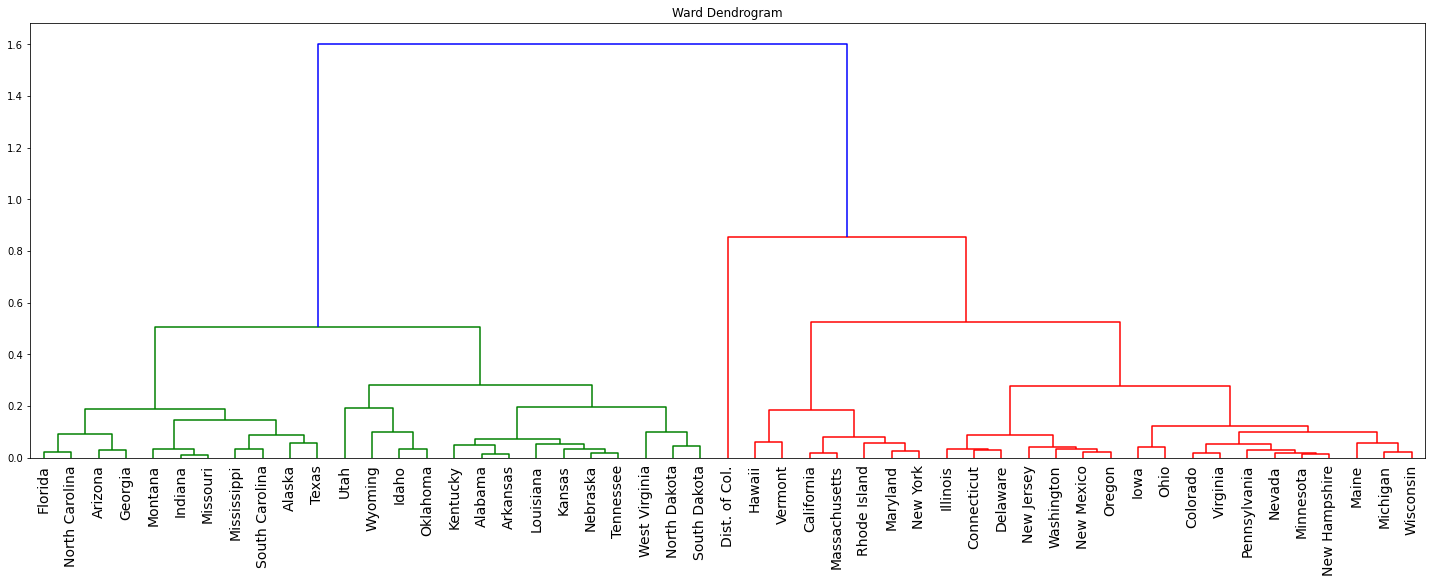

In [ ]:
# Plot the dendrogram for the Ward proximity measure
hier_clustering = linkage(df_X, method='ward')
fig, ax = plt.subplots(figsize=(25,8)) # custom figsize for æsthetics
# labels parameter must be ndarray object
dendrogram_ward = dendrogram(hier_clustering, ax=ax,
                             labels=s_states.to_numpy(), leaf_font_size = 14)
plt.title("Ward Dendrogram")
plt.show()

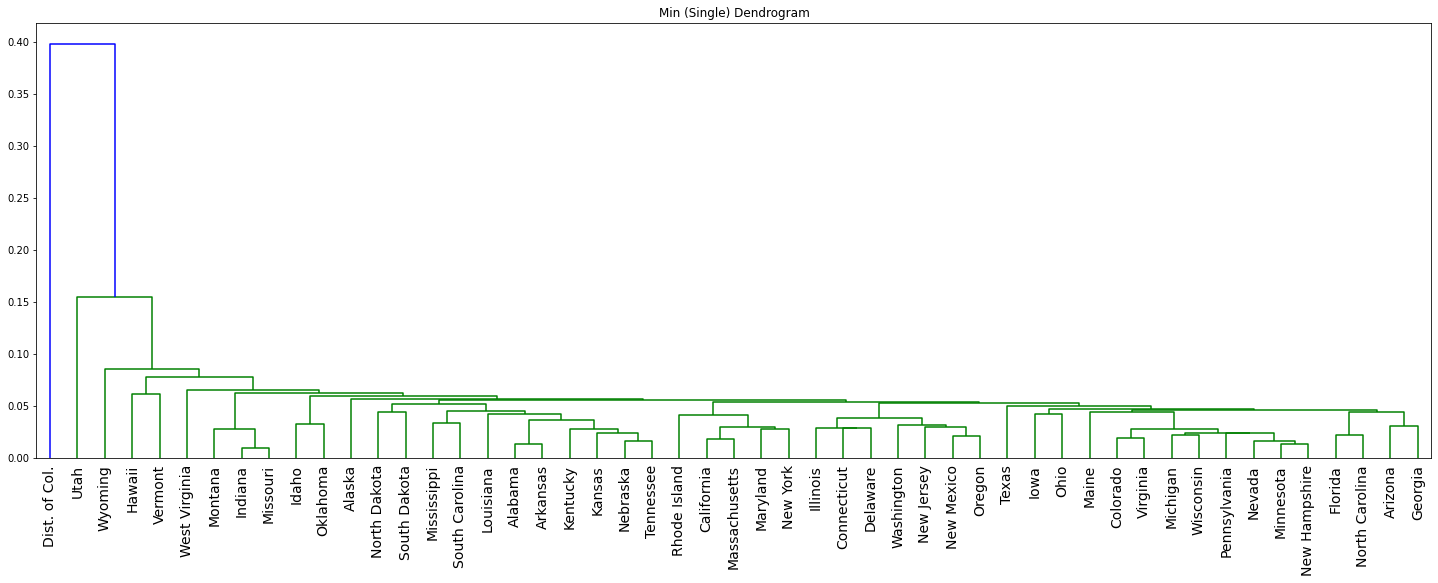

In [ ]:
# Plot the dendrogram for the min proximity measure
hier_clustering = linkage(df_X, method='single') # method 'single' ~ minimum
fig, ax = plt.subplots(figsize=(25,8))
# labels parameter must be ndarray object
dendrogram_min = dendrogram(hier_clustering, ax=ax,
                            labels=s_states.to_numpy(), leaf_font_size = 14)
plt.title("Min (Single) Dendrogram")
plt.show()


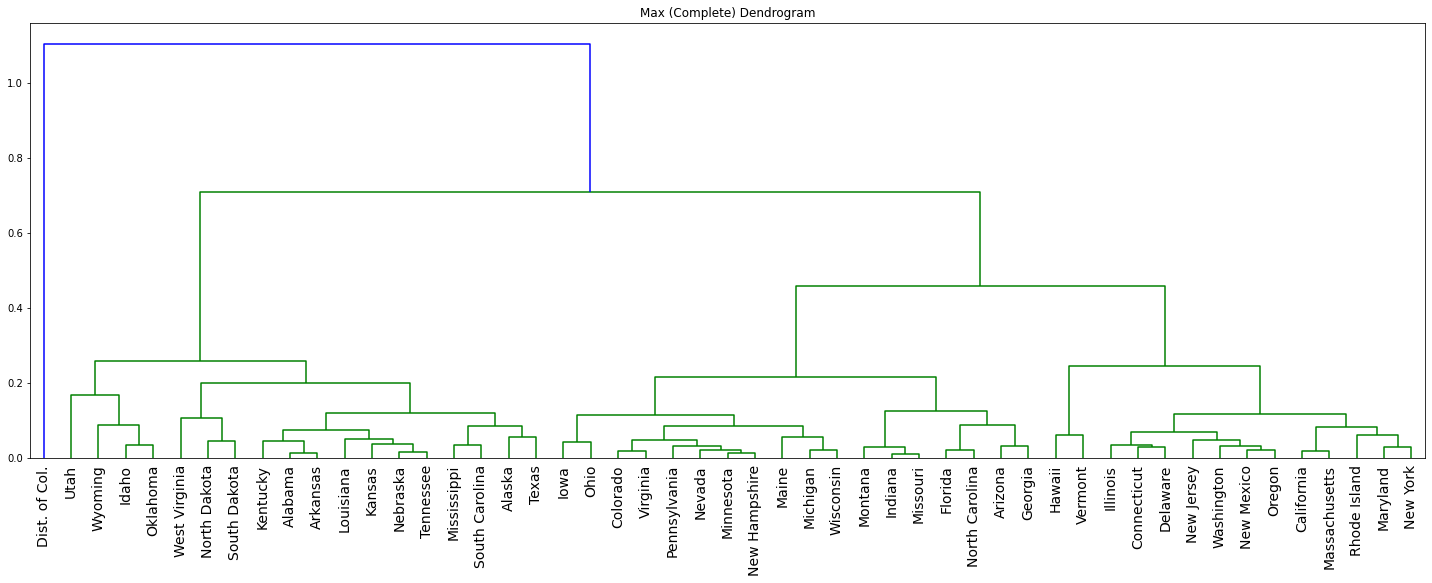

In [ ]:
# Plot the dendrogram for the max proximity measure
hier_clustering = linkage(df_X, method='complete') # method 'complete' ~ maximum
fig, ax = plt.subplots(figsize=(25,8))
# labels parameter must be ndarray object
dendrogram_max = dendrogram(hier_clustering, ax=ax,
                            labels=s_states.to_numpy(), leaf_font_size = 14)
plt.title("Max (Complete) Dendrogram")
plt.show()

## Q3 Calculate the Cophenetic Correlation Coefficient (CPCC)

Using the data from question 2 (creating hierarchical clusters on the percentage of Republican votes), calculate the Cophenetic Correlation Coefficient for each of the three methods.  Display the results, and add a markdown cell explaining how to interpret this metric. You may use the scipy [cophenet function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html) with the output from  [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) function as the `Y` parameter. 

In [ ]:
# pdist and CPCC calculations. "phenetic" (adj) == pair affinity
# cophenet(Z, Y). Z = heir tree/output of linkage(). Y = 1dimensional
# CophDistance is the distance at which any pair of points was put in the same cluster
hier_clustering = linkage(df_X, method='ward')
p = pdist(df_X) # pdist = proximity distance in the form of a condensed (NOT square) matrix
cpcc_ward = cophenet(hier_clustering, p)

hier_clustering = linkage(df_X, method='single')
p = pdist(df_X)
cpcc_min = cophenet(hier_clustering, p)

hier_clustering = linkage(df_X, method='complete')
p = pdist(df_X)
cpcc_max = cophenet(hier_clustering, p)

In [ ]:
# Show the results (cpcc_ward, cpcc_min, cpcc_max)
print("Cophenetic Correlation Distances:\n")
print("CPCC Ward:\n")
print(cpcc_ward[0]) # could use native round() function
print("\nCPCC Min/Single:\n")
print(cpcc_min[0])
print("\nCPCC Max/Complete:\n")
print(cpcc_max[0])

Cophenetic Correlation Distances:

CPCC Ward:

0.5883071696030503

CPCC Min/Single:

0.6954635857680919

CPCC Max/Complete:

0.7406937703705782


➡️   The CPCC is highest for Max/Complete Link and lowest for Ward's Method of hierarchical clustering. A higher CPCC means that there is a higher correlation between the distance at which two points were clustered and the proximity *of* those original two points. Therefore it makes sense that max and min would be higher than ward, considering that they are predicated on literal distance of original data points rather than the change of variance with cluster reassignment (as is the case with Ward's Method). ⬅️

## Q4 Find new Clusters Based on K-Means

A political wonk has come to visit you in your data science dungeon, and looks over your shoulder.  They like what they see, and especially like the patterns from the Ward proximity diagram, and their team is going to come up with 4 different strategies based on the clustering that you have done.  But, your hierarchical clustering didn't come up with a natural 4 clusters! No problem, you decide to use k-means to come up with the 4 clusters.  You choose these points to initialize your cluster centers based on the Ward proximity graph in your hierarchical clusters:

  - Montana
  - Arkansas
  - Massachusetts
  - Minnesota

Pass `random_state = 23` into the [KMeans function](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Print out your centroids before you pass them to K-Means. Print out the States that are in each k-means cluster.

In [ ]:
# Find the centroids
# use "init" parameter, since we're initializing the centroids manually
# Montana: 0.575769	0.570342	0.511694	0.064075
# Arkansas: 0.625343	0.621544	0.601717	0.023625
# Massachusetts: 0.338355	0.382143	0.368029	0.043788
# Minnesota: 0.471869	0.460588	0.447706	0.024163
initial_clusters = np.array([[0.575769, 0.570342, 0.511694, 0.064075],
                          [0.625343, 0.621544, 0.601717, 0.023625],
                          [0.338355, 0.382143, 0.368029, 0.043788],
                          [0.471869, 0.460588, 0.447706, 0.024163]])

# because init was manual, n_init MUST be 1, otherwise there is logical incongruence
kmeans = KMeans(n_clusters=4, random_state=23, init=initial_clusters, n_init=1).fit(df_X)
centroids = kmeans.cluster_centers_

In [ ]:
# Show the centroids
centroids

array([[0.55786771, 0.56317641, 0.54387936, 0.04491895],
       [0.64401981, 0.64469082, 0.60488823, 0.06064589],
       [0.31036802, 0.31523544, 0.31076018, 0.03514829],
       [0.45597638, 0.45072997, 0.43070259, 0.03709895]])

In [ ]:
# Compute the k-means clusters and show the listing of the States in each cluster
prediction_array = kmeans.predict(df_X)
df_X['cluster'] = prediction_array # add 'cluster' column onto dataframe
df_X['state'] = s_states # could've done this in one line

# create list of the clustered dataframe subsets
list_clusters = []
# NOTE: cluster 3 is going to comprise swing states
for n in range(4):
    list_clusters.append(df_X[df_X['cluster']==n])

print(*list_clusters, sep="\n\n") # use * to unpack the list of clusters

        2016      2012      2008     range  cluster           state
1   0.547239  0.573153  0.610648  0.063409        0          Alaska
2   0.497005  0.546134  0.543139  0.049129        0         Arizona
10  0.510487  0.539566  0.526280  0.029079        0         Georgia
14  0.571606  0.552004  0.494780  0.076825        0         Indiana
16  0.581759  0.611133  0.576123  0.035011        0          Kansas
18  0.590272  0.587468  0.594572  0.007103        0       Louisiana
24  0.583792  0.558019  0.566419  0.025773        0     Mississippi
25  0.577107  0.547787  0.500676  0.076431        0        Missouri
26  0.575769  0.570342  0.511694  0.064075        0         Montana
33  0.504612  0.510340  0.498340  0.012000        0  North Carolina
40  0.560878  0.553083  0.545444  0.015433        0  South Carolina
41  0.622154  0.592185  0.542957  0.079197        0    South Dakota
43  0.529599  0.580079  0.559359  0.050480        0           Texas

        2016      2012      2008     range  clu

## Q5 Visualize the Silhouette Coefficients for Each Cluster

Using the [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) implementation in sci-kit learn, calculate the silhouette coefficient for each of the States in our data frame using the clustering from Q4, and create a bar graph, similar to the [left plot in this link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Use the Silhouette Coefficient plot to identify clusters that have outliers.  Find the data points that are outliers and then describe in a markdown cells how the visualization helped you identify the outlier points.  

In [ ]:
# S.C. is a measure of how similar members of a cluster are to each other
# i.e. goodness-of-fit

s_clusters = df_X['cluster']
df_X.drop(columns=['cluster', 'state'], inplace=True)
X = silhouette_samples(df_X, s_clusters)
print("silhouette scores for 50 states and DC:")
print(X)
# now want MEAN silhouette coefficient for barPlot below

silhouette scores for 50 states and DC:
[ 0.27744788  0.31542681  0.44663791  0.28957943  0.13172132  0.61875969
  0.48733694  0.43344973  0.25331002  0.18949017  0.43163296  0.39090215
  0.46556557  0.32299373  0.511696    0.29896948  0.13146641  0.27939655
  0.13542379  0.67307534  0.15713781  0.14027985  0.6227449   0.63979841
  0.43553246  0.50957406  0.50833081 -0.03208193  0.65870183  0.59603857
  0.56600381  0.64334308  0.08688414  0.00077335  0.07785289  0.13805801
  0.42622323  0.63692427  0.55335597 -0.10501626  0.54594414  0.06102139
  0.04448214  0.52413071  0.2636053   0.37741429  0.53499093  0.49434088
  0.30489392  0.61164268  0.42333153]


In [ ]:
# find outliers by list of scores. check that order is the same! (it should be)
df_X_with_scores = df_X
df_X_with_scores["silhouette score"] = pd.Series(X)
df_X_with_scores["state"] = s_states # redundant, but who cares
# now filter by this added attribute
df_X_with_scores = df_X_with_scores[df_X_with_scores['silhouette score'] < 0]

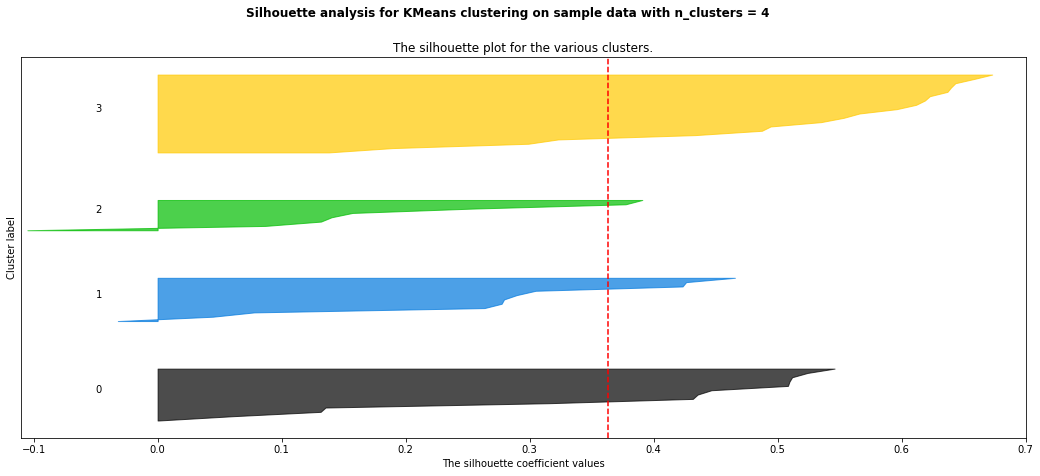

In [ ]:
# create Bar Graph visualization
n_clusters = 4 # in our case, this is a constant

fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)

# The subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 0.7], so edit xlim for readability
ax1.set_xlim([-0.11, 0.7])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
silhouette_avg = np.sum(X)/X.size

# # Compute the silhouette scores for each sample
# sample_silhouette_values = silhouette_samples(X, cluster_labels)
#df_X.drop(columns=['state'], inplace=True)
cluster_labels = prediction_array
sample_silhouette_values = X

y_lower = 10 # :== vertical margin between each cluster barGraph on y axis
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7, # opacity measure; we want slight transparency lest the color be lurid
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values, found above
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks; they're useless here
ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters, # string formatting with % operator
    fontsize=12,
    fontweight="bold",
)

plt.show()

In [ ]:
# identify outliers. we see that only clusters 1 and 2 have outliers, so:
# loop through cluster and collect states where silhouette coeff < 0
print(df_X_with_scores['state'])
df_X_with_scores

27        Nebraska
39    Rhode Island
Name: state, dtype: object


,2016,2012,2008,range,silhouette score,state
27,0.605273,0.611294,0.576091,0.035203,-0.032082,Nebraska
39,0.403165,0.359833,0.358019,0.045147,-0.105016,Rhode Island


➡️ _The graph shows the sihouette coefficients for each cluster, ordered from least to greatest (moving up). This gives us an idea of the goodness of fit for each of the 4 clusters, and also shows us that there exist two points for which the silhouette coefficient is LESS than 0, i.e. that these points are better off being in a different cluster than their own. The points, as we can see, are in clusters 1 and 2 for my personal implementation. Scanning through the silhouette coefficients ndArray, we isolate these states as **Nebraska** and **Rhode Island**. Sure enough, these states are indeed the only ones below 0, and in the clusters 1 and 2._ ⬅️